In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchwisdom.vision.data import *
from torchwisdom.vision.trainer import ConvClassifierTrainer
from torchwisdom.core.callback import AccuracyCallback, AccuracyTopKCallback, MSECallback, AccuracyRegressionCallback
from torchwisdom.vision.models import SimpleCNN

In [3]:
root_path = '/data/att_faces_new/'
data = image_classifier_data(root_path, image_size=(64, 64))

In [4]:
x,y = next(iter(data.valid_loader))
x.shape

torch.Size([32, 3, 64, 64])

In [5]:
scnn = SimpleCNN(in_chan=3, num_classes=40, input_size=(64, 64))
xin = torch.rand(1,3,64,64)

In [6]:
trainer = ConvClassifierTrainer(data=data, model=scnn)
trainer.compile(optimizer='adam', criterion=nn.CrossEntropyLoss())
trainer.resumeable(True)
trainer.save_best(True)

epoch,trn_loss,val_loss,time,remain
1,307.868835,97.119591,0:00:01.35,0:00:01.35
2,194.229492,144.143799,0:00:01.43,0:00:00.08


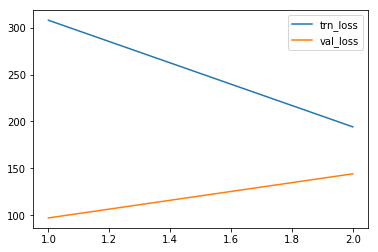

In [7]:
trainer.fit(2, lr=0.02)

In [8]:
feat, targ = next(iter(data.valid_loader))

In [11]:
trainer.predict(feat[:2], use_topk=True, kval=3)

(tensor([[9.4736e-01, 5.2650e-02, 1.7722e-17],
         [9.9902e-01, 9.7161e-04, 8.1237e-07]]), tensor([[20, 23, 33],
         [20, 23, 33]]), [['s28', 's30', 's4'], ['s28', 's30', 's4']])

In [28]:
trainer.export("export/faces_export.pth")

In [29]:
from torchwisdom.vision.data import *
from torchwisdom.vision.models import SimpleCNN
from torchwisdom.vision.trainer import ConvClassifierTrainer
from torchwisdom.vision.predictor import *


root_path = '/data/att_faces_new/'
data = image_classifier_data(root_path, image_size=(64, 64))
feat, targ = next(iter(data.valid_loader))

predictor = ConvClassifierPredictor("export/faces_export.pth")
predictor.predict(feat[:10], use_topk=True, kval=2)

(tensor([[0.9678, 0.0318],
         [0.9890, 0.0057],
         [0.9887, 0.0110],
         [0.9876, 0.0114],
         [0.8361, 0.0747],
         [0.8982, 0.1014],
         [0.9268, 0.0555],
         [0.5092, 0.2017],
         [0.9202, 0.0446],
         [0.5354, 0.3819]]), tensor([[15, 35],
         [35, 30],
         [15, 35],
         [35, 15],
         [18, 35],
         [15, 35],
         [35, 15],
         [35, 30],
         [30, 18],
         [15, 18]]), [['s23', 's5'],
  ['s5', 's37'],
  ['s23', 's5'],
  ['s5', 's23'],
  ['s26', 's5'],
  ['s23', 's5'],
  ['s5', 's23'],
  ['s5', 's37'],
  ['s37', 's26'],
  ['s23', 's26']])